# Preliminaries

## Dataset

In this set of exercises we will use the same dataset as from [week 3](week_3.ipynb). 


As before, we provide the data already curated in the following two files:

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data can be read as `pandas` `DataFrame` in the following way:

In [1]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

The goal of the exercises is to train support vector machine (SVM) and random forests classifiers on this dataset and explore and learn about their hyperparameters. 

## Tools

The `scikit-learn` library provides the required tools for support vector machines, as well as for random forest algorithms.

In [2]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs, make_circles
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import scipy


C:\Users\20192024\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Before proceeding, look up the documentation of the imported functions and read about their basic functionality. Below, we list some important parameters of SVMs and random forests that can be tuned during training.

#### Support Vector Machines (SVM)

`C`: error term.

`kernel`: similarity function ('linear', 'poly', 'sigmoid' or 'rbf')

`gamma`: kernel coef. for 'rbf', 'poly' and 'sigmoid' kernels. It can be thought of as the ‘spread’ of the kernel and therefore the decision region.

`degree`: degree for the 'poly' kernel.

`coef0`: independt term in the 'poly' and 'sigmoid' kernels


#### Random Forests

`n_estimators`: number of trees in our random forest.

`max_depth`: maximum number of levels in each decision tree

`max_features`: maximum number of features to consider per split in an individual tree.

`min_sample_leaf`: minimum number of data points per leaf node

`min_samples_split`: minimum number of data points placed in a node before the node is split

`oob_score`: the out-of-bag (OOB) error is the average error for each observation calculated using predictions from the trees that do not contain that observation in their respective bootstrap sample. Set this parameter to true.

`bootstrap`: method for sampling data points (with or without replacement). Set this parameter to true.

`criterion`: function used to measure the quality of the split (e.g. 'entropy' or 'gini')

# Exercises

## Support vector machines

The  `make_blobs` and `make_circles` functions can be used to generate linearly and not linearly separable toy datasets. 

In [3]:
# data generation: linearly separable
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

The following code illustrates how to train a linear SVM classifier and plot the data points, the separating hyperplane, the support vectors and the margins that pass through them (considering the training data)

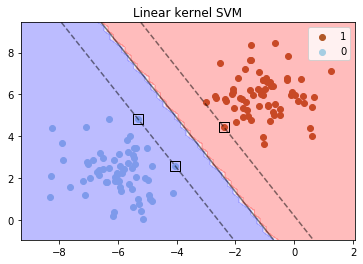

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# build the model
model = svm.SVC(kernel='linear', random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Linear kernel SVM')
plt.show()

Train a radial basis function (RBF) SVM classifier with `gamma=0.5` and plot the results in the same way.

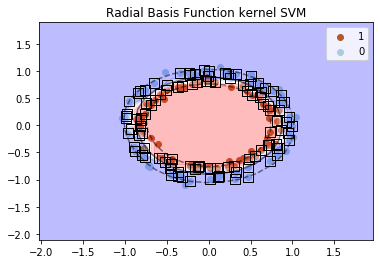

In [5]:
# data generation: not linearly separable
X, Y = make_circles(n_samples=200, noise=0.05, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

# build the model
model = svm.SVC(kernel='rbf', random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Radial Basis Function kernel SVM')
plt.show()

<p><font color='#770a0a'>When should a RBF kernel be used over a linear kernel? Motivate your answer.</font></p>

<p><font color='#770a0a'>Do we need to normalize the data before using a kernel function? Motivate your answer.
</font></p>

A RBF kernel should be used when the data is linearly non-separable. That is if the dataset is non-linear or the potential boundary to separate the different classes is not a straight line.

Yes we need to normalize the data. The RBF kernel (and other kernels as well) computes the distance / difference between x and y in some way (Euclidian or something different). If we would not normalize the data, every feature has a different scale which causes some features to contribute more to the similarity / distance computation than others. This causes a bias towards certain features that is not justified.



## Predicting drug response on cell lines from gene expression data with SVMs

Explore the hyper-parameter space of an SVM classifier with cross-validation for the Genomics of Drug Sensitivity in Cancer (GDSC) dataset. The`GridSearchCV` function can be used to specify a grid of parameter values with the `param_grid` parameter.

Calculate the precision of your predictions, and compare your calculations with the results of `classification_report`, which displays many classification metrics.


In [6]:
# Define X (variables) and y (target)
X = gene_expression
y = drug_response


# Based on the z-score being lower or higher than 0 the drug_response is either classified 
# as sensitive or resistant respectively
drug_response = scipy.stats.zscore(drug_response).ravel()
y_class = (drug_response > 0).astype(int)

# We split in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.25, random_state=42)

# We scale the variables in the training dataset and perform this same transformation on the test set
# As mentioned earlier, scaling the features is very important when using a kernel function

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# define the model
model = svm.SVC()

# For SVM, three hyperparameters are the most important to be tuned:
# the regularization strength (C), the kernel type (e.g. linear, RBF, sigmoid etc.) and the kernel coefficient for rbf, 
# sigmoid and poly (Gamma)
# We can also try different values for the degree of the polynomial kernel and the coefficient (= independent term for the
# poly and sigmoid kernels)

# We define the parameter grids for these three hyperparameters

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid'], 'degree':[1,2,3,4], 'coef0':np.logspace(-1,1,4)}

# We perform the grid search
gscv = GridSearchCV(model,param_grid,refit=True)
gscv.fit(X_train,y_train)

print(gscv.best_estimator_)

# We predict on the test set and calculate model performance

gscv_pred = gscv.predict(X_test)

# Precision = tp / (tp+fp)
tp = sum(gscv_pred * y_test)
fp = np.sum(np.logical_and(gscv_pred == 1, y_test == 0))
precision = tp / (tp+fp)

# Print confusion matrix, classification report and calculated precision score
print(confusion_matrix(y_test,gscv_pred))
print(classification_report(y_test,gscv_pred))
print('Calculated precision is ' + str(precision))


SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.46415888336127786, decision_function_shape='ovr', degree=1,
    gamma=0.01, kernel='sigmoid', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)
[[16  5]
 [ 7  9]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73        21
           1       0.64      0.56      0.60        16

    accuracy                           0.68        37
   macro avg       0.67      0.66      0.66        37
weighted avg       0.67      0.68      0.67        37

Calculated precision is 0.6428571428571429


In [7]:
type(drug_response)

numpy.ndarray

The calculated precision is 0.75, which indeed corresponds to the precision for classification 1 as mentioned in the classification report. For the label 1 (second row in classification report) the true positives are all samples that are predicted as 1 that actually have label 1 in the test set. The false positives are all samples that are predicted as label 1 when in fact they have label 0 in the test set. For the first row in the classification report (precision for label 0) this is the other way around, but we view 'precision' here as a positive being label 1 (not 0).


## Random forests

Follow the same steps as for SVM. Compare the two algorithms and report which one has better performance.

The random forests classifiers allows to perform feature selection. Evaluate the importance of features extracting the top 50 informative features. A bar plot (`plt.bar()`) can be a useful tool to visualize this. 

In [8]:
# define the model
model_rf = RandomForestClassifier()

# For RandomForestClassifier the following hyperparameters can be tuned:
# n_estimators, max_depth, max_features, min_sample_leaf, min_samples_split, oob_score, bootstrap and criterion


n_estimators = [50, 100, 200, 1000]
max_features = ['auto', 'sqrt']
max_depth = [5, 10, 50, 100]
min_samples_split = [2, 5, 10]
criterion = ['entropy', 'gini']

# For bootstrap and oob_score, the introduction of this notebook indicated to set them both to true
# I don't know if we still need to do hyperparameter tuning over these two then?
# If it takes too long we can just set both bootstrap and oob_score to true
bootstrap = [True]
oob_score = [True]


# We define the parameter grids for these three hyperparameters

param_grid = {'n_estimators': n_estimators, 'max_features' : max_features, 'max_depth' : max_depth, 'min_samples_split':min_samples_split, 'criterion':criterion, 'bootstrap': bootstrap, 'oob_score': oob_score}

# We perform the grid search
gscv = GridSearchCV(model_rf,param_grid,refit=True)
gscv.fit(X_train,y_train)

best_model = gscv.best_estimator_
print(best_model)

# We predict on the test set and calculate model performance

gscv_pred = gscv.predict(X_test)

# Precision = tp / (tp+fp)
tp = sum(gscv_pred * y_test)
fp = np.sum(np.logical_and(gscv_pred == 1, y_test == 0))
precision = tp / (tp+fp)

# Print confusion matrix, classification report and calculated precision score
print(confusion_matrix(y_test,gscv_pred))
print(classification_report(y_test,gscv_pred))
print('Calculated precision is ' + str(precision))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=100, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)
[[17  4]
 [ 5 11]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.73      0.69      0.71        16

    accuracy                           0.76        37
   macro avg       0.75      0.75      0.75        37
weighted avg       0.76      0.76      0.76        37

Calculated precision is 0.7333333333333333


For SVM the calculated precision was approximately 0.64. For the random forest classifier, we get a higher precision of 0.82 approximately. Hence, in terms of precision, random forest outperforms the SVM here. In terms of recall and f1-score, the two types of classifiers do not differ as much (0.56 and 0.60 for SVM and 0.56 and 0.67 for random forest).

In [9]:
# Compare performance random forest and SVM
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=100, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
# Extract top 50 most important features

feature_importances = pd.DataFrame(best_model.feature_importances_, index = X.columns,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances.iloc[0:50]

,importance
ABCB1,0.058372
CDX2,0.024570
CNRIP1,0.022887
KRT7,0.020312
IFIT1,0.014698
RAMP1,0.014350
IRX3,0.013462
MIR205HG,0.013328
SPOCK1,0.012951
RAB34,0.012648


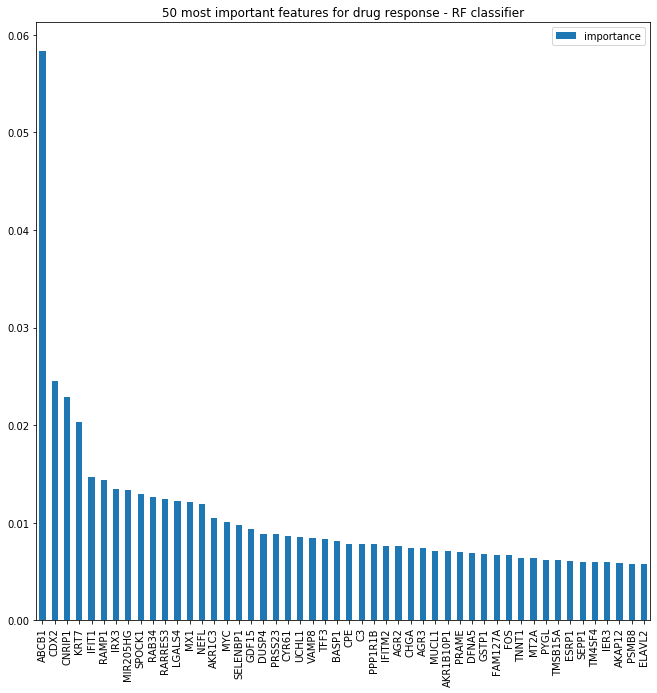

In [11]:
feature_importances.iloc[0:50].plot.bar(figsize=(11,11), title='50 most important features for drug response - RF classifier')

ABCB1 seems to be the most important of the 50 by far (as the second most important feature, MIR205HG) has half the importance score). The importance of ABCB1 is approximately 0.042 which is on itself not spectacularly high. Moreover, we see that after the 20th feature approximately (halfway roughly), the importance scores do not differ as much for the last couple of features. The bar plot shows that the bars are at roughly the same height.

## Biomedical applications

Driven by technological advances, there has recently been a dramatic increase in availability of biomedical data. Machine learning approaches are well suited to take advantage of this data and have been widely applied to many areas of biology. 

Example of these applications are genome annotation, biomarker identification, systems biology, genome data analysis, protein  function  prediction, protein  structure prediction, protein localization prediction, identification of protein interactions and drug discovery.

SVM and RF methods are among the most popular machine learning methods applied in bioinformatics or computational biology.

Perform a literature search and find a biomedical study in which SVM or RF is applied to obtain certain insights. <p><font color='#770a0a'>Explain the motivation behind using that specific algorithm in the study.
</font></p>

Biomedical study: Taoudi-Benchekroun, Y., Christiaens, D., Grigorescu, I., Gale-Grant, O., Schuh, A., Pietsch, M., Chew, A., Harper, N., Falconer, S., Poppe, T., Hughes, E., Hutter, J., Price, A. N., Tournier, J. D., Cordero-Grande, L., Counsell, S. J., Rueckert, D., Arichi, T., Hajnal, J. V., . . . Batalle, D. (2022, augustus). Predicting age and clinical risk from the neonatal connectome. NeuroImage, 257, 119319. https://doi.org/10.1016/j.neuroimage.2022.119319

In this study, machine learning is used to interpret the brain connectivity maps (connectomes) of individual patients obtained with Diffusion MRI. This is done with the ultimate goal of understanding how and why individual development of perinatal brain connectivity differs per individual. This perinatal brain connectivity development plays an important role in the way motor, cognitive and behavioral abilities come to expression later in life.

Random Forest regression is used in this study to predict demographic and neurodevelopmental characteristics from neonatal structural connectomes in a large sample of babies ($n$ = 524). Predictions of post menstrual age (PMA) and gestational age (GA) at birth were found to be accurate, both continuous target variables.

They also used the ability of Random Forest to select the most important features for predicting the PMA and GA. Next to this they employed grid search to tune their hyperparameters without overfitting their data
